In [1]:
pip install pandas seaborn shap scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 5.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 10.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Columns after preprocessing:
 Age                           int64
AgeGroup                      int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
SalarySlab                    int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int6

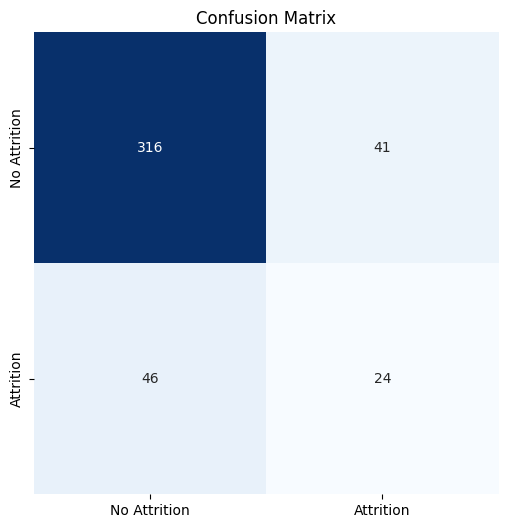

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

# Load the dataset (make sure to replace this with the actual path of your CSV file)
data = pd.read_csv('HR_Analytics.csv')

# Data Preprocessing
# Handle missing values if necessary (drop rows with missing values for simplicity)
data = data.dropna()  # You can also fill missing values instead of dropping if needed

# Encode categorical columns using LabelEncoder (or get_dummies for one-hot encoding)
label_encoder = LabelEncoder()

# Encode columns like 'Attrition', 'BusinessTravel', 'Department', 'Gender', etc.
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])  # 'Yes' -> 1, 'No' -> 0
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])
data['SalarySlab'] = label_encoder.fit_transform(data['SalarySlab'])  # This should be categorical
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['AgeGroup'] = label_encoder.fit_transform(data['AgeGroup'])  # Encoding AgeGroup column
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])  # Encoding EducationField column

# Drop columns that should not be used for modeling (e.g., EmployeeNumber, EmployeeCount, Over18, StandardHours, EmpID)
# These are identifiers or constant values
data = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'EmpID'])

# Check if all columns are numeric
print("Columns after preprocessing:\n", data.dtypes)

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Attrition'])  # Drop 'Attrition' as it is the target
y = data['Attrition']  # Target variable: Attrition

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Classification Model (Decision Tree or Logistic Regression)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Accuracy Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.show()

# SHAP Value Analysis
# Initialize the SHAP explainer (use TreeExplainer for Decision Tree)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot for both classes (binary classification: Attrition=1, No Attrition=0)
